<a href="https://colab.research.google.com/github/jkjh23/BusanAIDeveloperCourse_AI/blob/master/3_DeepLearning/13-5_%EA%B0%95%ED%99%94%ED%95%99%EC%8A%B5_dqn%EC%9D%84%20%EC%9D%B4%EC%9A%A9%ED%95%9C%20%EC%B9%B4%ED%8A%B8%ED%8F%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import Image

# DQN

- Deep Q-Network
- 심층 강화 학습
- 개요
  - Q 학습에서 행동가치함수는 행렬 -> 테이블로 표현했음
  - 상태가 많아지면, 테이블의 행의 수도 증가하게 된다
  - 학습량이 많아진다 => 시간이 많이 소요됨 -> 효율성을 고려, 성능, 시간 등 고려했을 때, 뉴럴 네트워크 방식으로 진행하면 더욱 효율적이다
  - 입력 : 상태
  - 출력 : 행동
  - 특정 상태에서 특정 행동을 선택할 확률을 추론한다


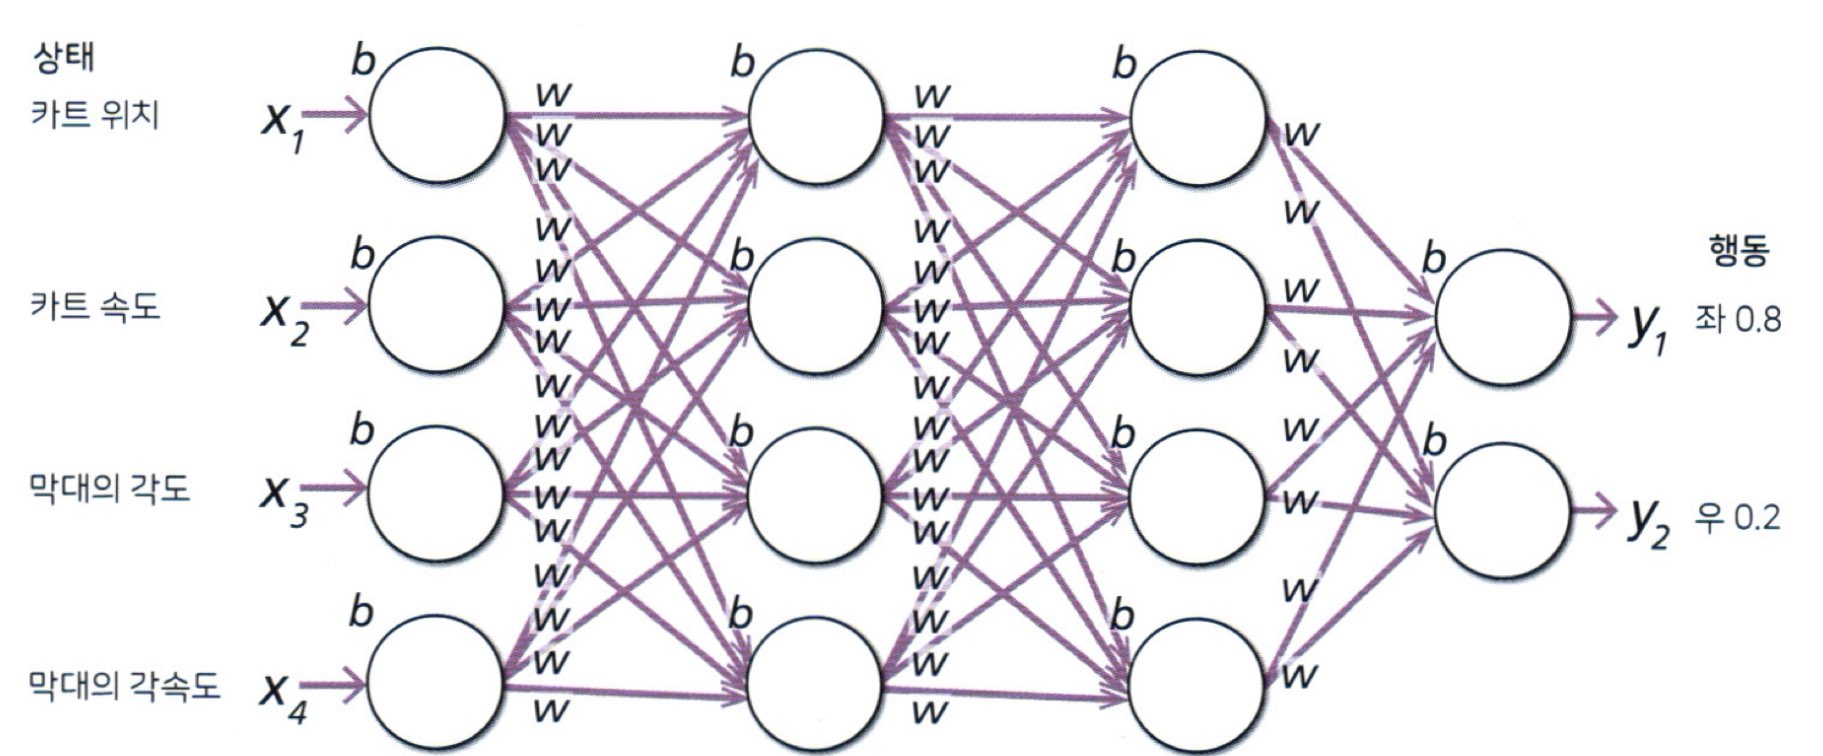

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/dqn1.jpeg')

# openAI의 GYM에서 제공하는 카트폴 게임에 적용할 신경망 샘플
# DNN(은닉층이 2개 이상), ANN(은닉층이 1개)
# 카트폴 게임 : http://gym.openai.com/envs/CartPole-v1/
# 미로 게임 대비 상태가 4개로 증가되었음 -> 연산이 많아진다 -> NN으로 대체

# 시뮬레이터

- OpenAI Gym
  - 비영리 단체로 openAI를 제공(현재는 영리 단체로 이동중)
  - 강화 학습을 시뮬레이션 할수 있는 툴킷을 지원
  - vs Unity ML-Agent도 가능
  - [사용 시뮬레이터](http://gym.openai.com/envs/CartPole-v1/)
    

# 강화 학습 요소 분석

|강화 학습 요소|카트-폴|
|--:|:--|
|에이전트|카트를 조정하는 자|
|환경|레일 상에 카트가 존재하고 그위에 막대기가 세워져 있다. 카트는 좌우로 움직인다|
|목적|막대가 쓰러지지 않게 카트의 균형을 잡는것|
|행동|- 카트를 왼쪽으로 이동<br>- 카트를 오른쪽으로 이동|
|에피소드|- 막대가 쓰러지면 종료<br>- 카트가 중심점에서 2.4 Unit 단위를 벗어나면 종료<br>- 수직에서 15도 이상 떨어져도 종료<br>- 종료에 대한 체크는 게임시뮬레이터에서 제공해준다(체크만 하면된다)|
|상태|- 카트의 위치<br>- 카트의 속도<br>- 막대의 속도<br>- 막대의 각속도|
|보상|에피소드 완료시 190회이상 무빙을 했다면 리워드 1|
|학습방법|행동 가치 반복법 > DQN|
|파라미터 변경 주기(정책 결정하는 측면)|행동 1회 수행하면 갱신|

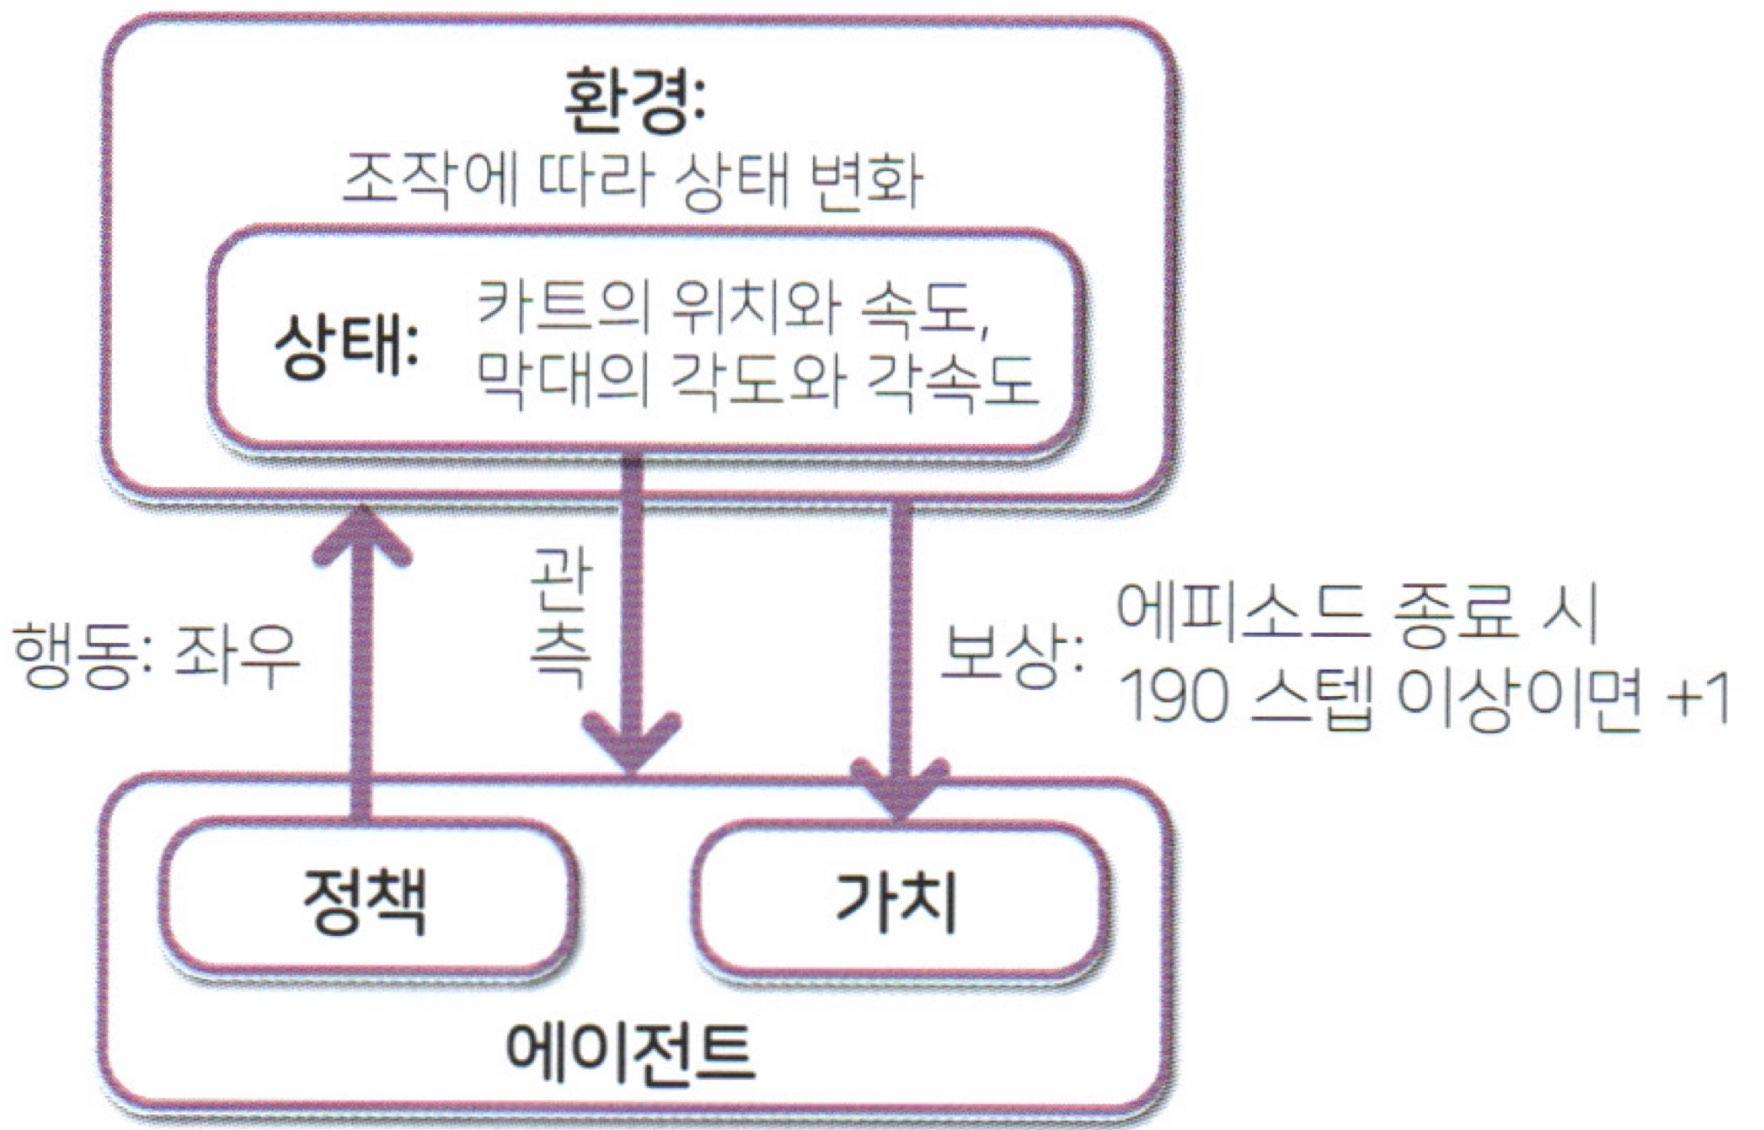

In [ ]:
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/dqn2.jpeg', width=400)

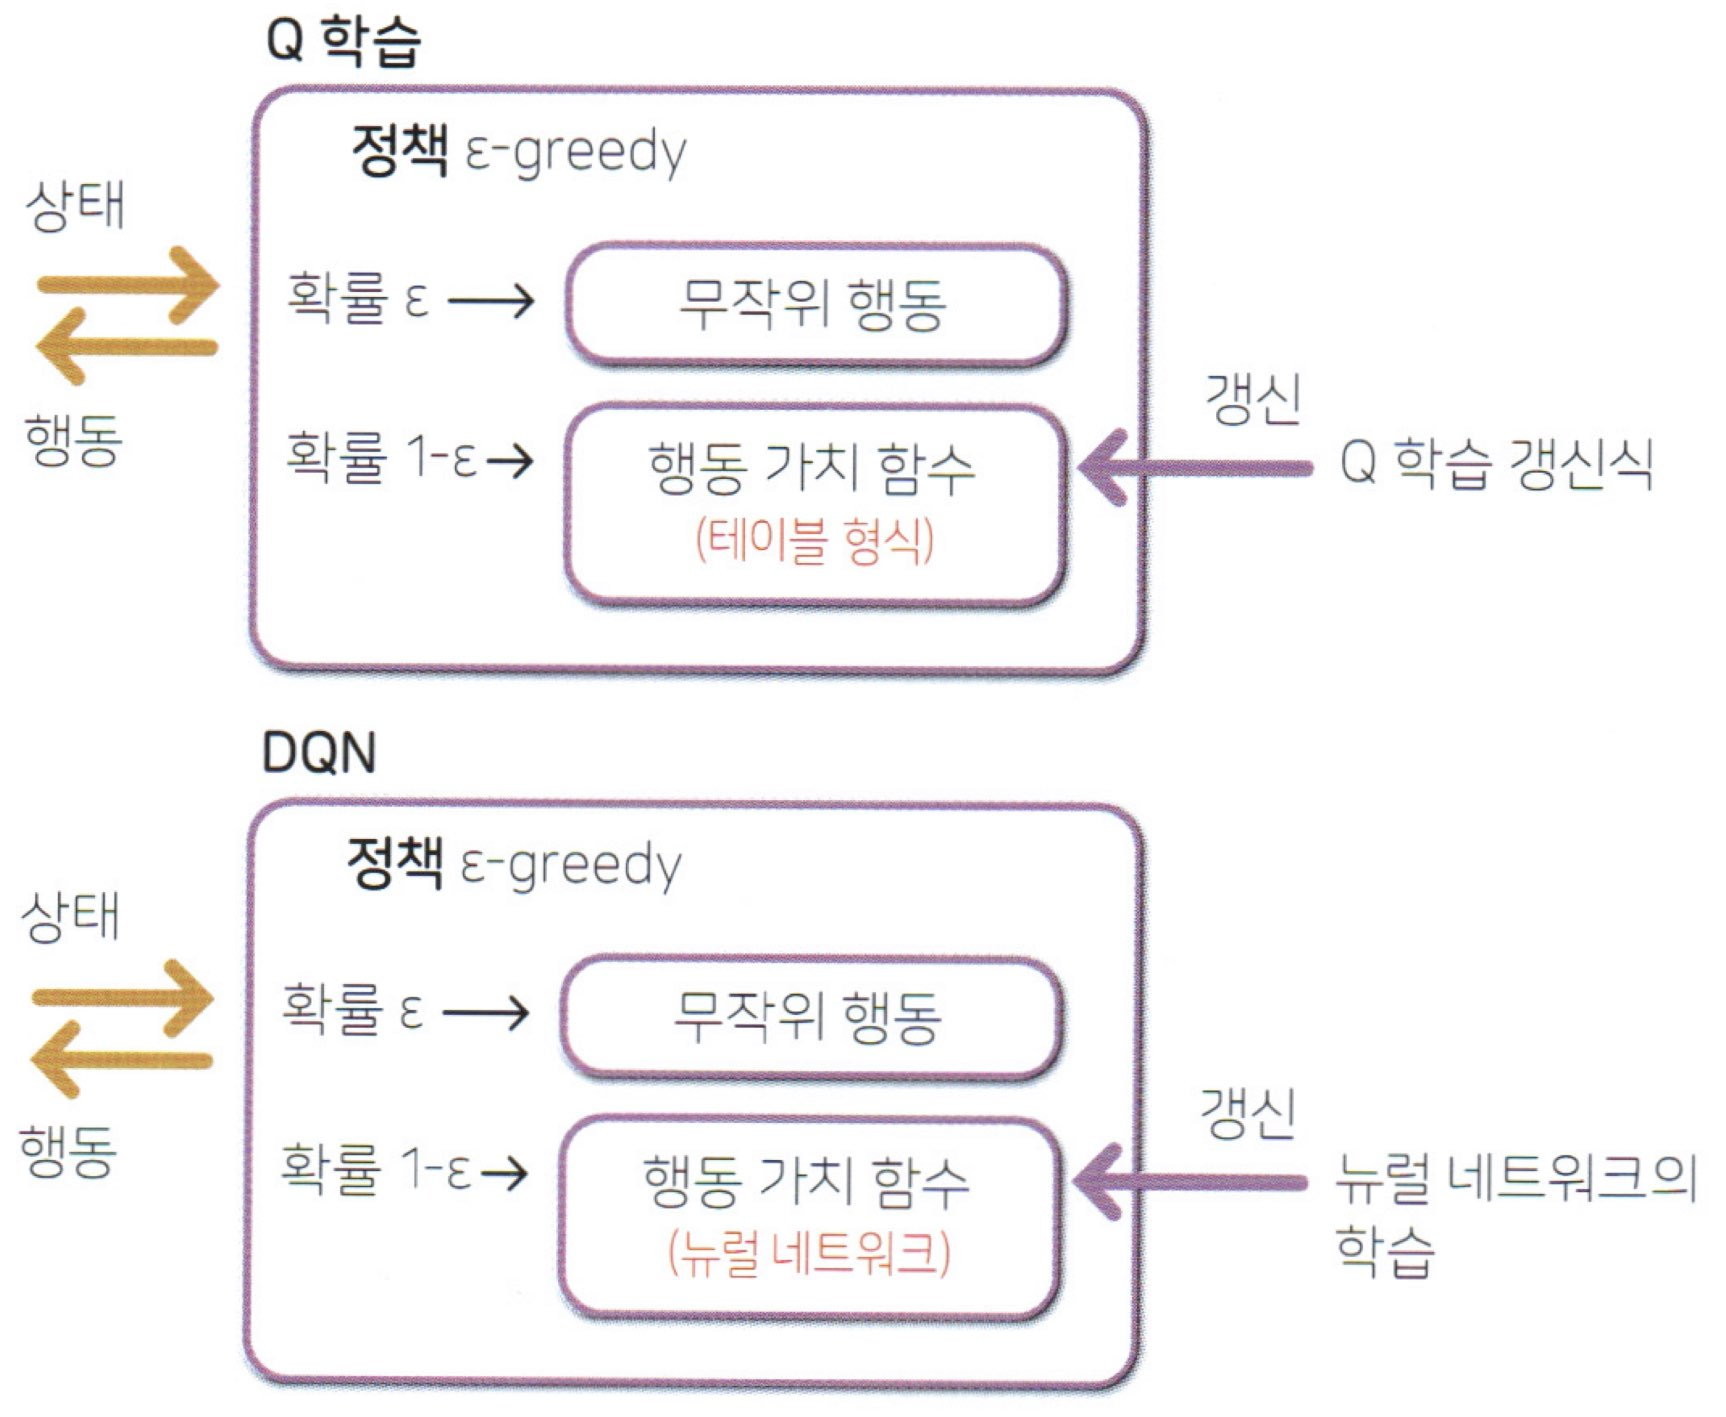

In [ ]:
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/dqn3.jpeg', width=400)

# 학습을 통해서 행동 가치 함수가 갱신된다

# 뉴럴 네트워크 구성

- DQN은 행동 가치 함수를 뉴럴 네트워크로 구성
- 입력
  - 4개 (카트 위치, 속도, 막대 각도, 각속도)
  - ex) [ 0.00024, 0.002320. 0.3210, 0.232 ]
  - 입력은 4개의 상태를 표현한것이다
- 출력
  - 카트를 왼쪽으로 이동해서 얻는 가치
  - 카트를 오른쪽으로 이동해서 얻는 가치
  - ex) [ 0.45, 0.55 ]
  - 학습을 통해서 특정 상태에서 특정 행동을 선택할때 판단 기준이 되는 가치를 추론할수 있다
- DNN 구성
  - 입력층에 입력 4개
  - 은닉층은 3개
  - 은닉층은 4 -> 16, 16 -> 16, 16 -> 16
  - 출력층은 2개 : 16 -> 2 수렴
- Keras를 사용
  - backend는 tensorflow 1.15 사용

# DQN을 위한 4가지 핵심(지원 기반 기술) 기술

## Experience Replay


- 경험 -> 메모리기능 추가 -> 큐
- Q 학습에서는 경험(상태, 행동, 보상, 다음 상태)을 순서에 따라서 진행(학습되었다)
- DQN은 시간적으로 상관관계가 높은 내용들을 연속적으로 학습하게 되어서, 학습의 불안정성을 가질 수 있다.
  - 데이터를 축적하여(메모리 공간에 기억하여서)
  - 무작위로 이 데이터를 학습하여 안정성을 추구한다.
  - Q 학습과는 다른 방향으로 전개

## Fixed Target Q-Network

- 갱신 대상이 되는 네트워크와 갱신을 위한 계산용 네트워크가 분리되고 운용된다
- Q 학습은 행동 가치 함수 자체를 이용하여서 갱신을 수행
- 같은 논리로 네트워크를 운영하면 학습의 불안정성을 도래하게 된다 -> 영향을 미친다.
  - 갱신 대상이 되는 뉴럴 네트워크를 메인 네트워크로 구성
  - 갱신량을 계산하기 위한 뉴럴 네트워크를 대상 네트워크로 구성
  - 대상 네트워크는 과거의 메인 네트워크가 되고, 일정 간격으로 메인 네트워크의 가중치를 대상 네트워크로 덮어쓰면서 갱신한다.
    - 갱신 포인트 => 가중치!

##  Reward Clipping

- 일반적으로 환경으로부터 받는 보상값의 스케일이 모두 다르다.
- DQN은 보상 범위를 -1, 0, 1로 고정한다
- 이런 보상 범위로 인해, 환경에 상관없이 하이퍼파라미터를 이용하여 학습을 수행할 수 있다
- 여기서는 특별하게 적용하지 않는다

## Huber Loss

- 오차(손실)함수는 RMSE가 아닌 huber를 사용한다
- RMSE를 사용하면, 출력값의 큰 편차가 학습의 불안정성을 야기시킨다
- DQN은 huber를 이용하여 값이 안정되도록 처리한다.
- 값에 덜 민감한 손실함수이다.

# 코드1 - 모듈 가져오기

In [ ]:
!pip install tensorflow==1.15

     |████████████████████████████████| 412.3MB 38kB/s 
     |████████████████████████████████| 512kB 55.8MB/s 
     |████████████████████████████████| 3.8MB 48.9MB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=65811aa100260c8938f6212c8e86a1782a86a061d8fce1513197f8fae213de40
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninsta

In [ ]:
import tensorflow as tf
tf.__version__

'1.15.0'

In [ ]:
# 게임 엔진
import gym
print(gym.__version__)

# 기본 모듈
import numpy as np

# 신경망 구성
# 신경망 객체
from tensorflow.keras.models import Sequential
# 은닉층 등 각종 층 구성
from tensorflow.keras.layers import Dense
# 최적화도구
from tensorflow.keras.optimizers import Adam
# 손실함수
from tensorflow.losses import huber_loss

# 경험을 저장할 버퍼(자료구조)
# 큐   : 먼저 들어온 멤버가 먼저 나간다.
# 스택 : 나중에 들어온 멤버가 먼저 나간다. -> 쌓였다
from collections import deque

0.17.2


# 코드 2 - 환경변수 정의, 파라미터값, 임계값, 수치 등

In [ ]:
# 학습 및 에피소드에 관련된 파라미터
NUM_EPISODES = 500    # 에피소드 개수
MAX_STEP = 190 + 10   # 190 : 에피소드 종료 시 보상을 받는 임계값(경계값), 10은 유연하게 부여하는 수치
                      # 에피소드가 끝나지 않아도, 190회가 넘어갔으면 이미 보상을 받을 조건이 완료되었다.
                      # 그러나 종료되지 않으면 게임이 계속 진행될 수 있으므로, 10번 정도 유예를 둔다.
GAMMA = 0.99          # 시간 할인율, 설정값
WARMUP = 10           # 실제 학습에 반영되기 전에 설정값(10회 정도)만큼 예열하는 단계

# 엡실론 그리기 파라미터값 정리, E_START -> 엡실론 -> E_STOP까지 E_DESC_RATE 비율로 줄여나가겠다
E_START = 1.0         # 엡실론의 초기값
E_STOP = 0.01         # 엡실론의 최종값
E_DESC_RATE = 0.001   # 감쇠율

# 메모리 파라미터
MEMORY_SIZE = 10000   # 설정값, 저장 가능한 개수
BATCH_SIZE = 32       # 설정값, 메모리에 저장된 경험들 중에 무작위로 32개를 추출하여서 학습에 사용

# 코드 3 - DQN 구현, Q 네트워크 구성

In [ ]:
# 인공신경망 구성
# 상속이 아닌, 멤버 변수로 신경망을 보유하겠다.
class QNetwork :
  # state_size  : 상태의 수 => 4 (카트의 위치/속도, 막대의 각도/각속도)
  # action_size : 행동의 수, 행동을 통해 얻는 가치를 파라미터로 가진 2개의 값 => 왼쪽/오른쪽으로 갈 때 얻는 가치
  def __init__(self, state_size, action_size) :
    # 1. 모델 생성
    self.model = Sequential()
    # 2. 입력층 구성하여 바로 1번 은닉층에 연결
    self.model.add( Dense(16, activation='relu', input_dim=state_size) )
    # 3. 1번 은닉층을 2번 은닉층에 연결
    self.model.add( Dense(16, activation='relu') )
    # 4. 2번 은닉층을 3번 은닉층에 연결
    self.model.add( Dense(16, activation='relu') )
    # 5. 3번 은닉층을 출력층에 연결
    self.model.add( Dense(action_size, activation='linear') )
    # 6. 컴파일(최적화, 손실함수)
    # lr : 학습률(0보다 큰 float, 설정값)
    self.model.compile( loss=huber_loss, optimizer=Adam(lr=0.001) )

# 코드 4 - Experience Replay 구현을 위한 Queue 구성(경험 메모리 구성)

In [ ]:
class Memory() :
  # 메모리 실제 담당하는 디큐 객체 생성
  def __init__(self, memory_size) :
    self.buffer = deque( maxlen=memory_size )

  # 경험 추가
  def add(self, experience) :
    self.buffer.append( experience )

  # batch_size에 해당되는 데이터를 큐에서 무작위로 뽑아내어 리턴
  # batch_size => 32개를 무작위로 뽑는다.
  def sample(self, batch_size) :
    # len(self.buffer)              => 쌓인(저장된) 경험수
    # np.arange( len(self.buffer) ) => 0부터 연속된 수로 배열 생성
    # size=32                       => 무작위로 32개를 랜덤하게 추출
    # replace=False                 => 매번 새롭게 생성
    indexs = np.random.choice( np.arange( len(self.buffer) ), size=batch_size, replace=False )
    # [] => 경험
    # [ [], [], [], [], ... ]
    return [ self.buffer[i] for i in indexs ]

  # 경험 메모리에 저장된 경험수를 리턴
  def __len__(self) : 
    return len(self.buffer)

In [ ]:
# indexs의 형태 한 번 확인
indexs = np.random.choice( np.arange( 100 ), size=32, replace=False )
indexs

array([ 6, 27, 64, 68, 74, 22, 98, 94, 21, 86, 60, 85, 36,  7, 55, 57, 92,
       80, 70, 32, 87, 81,  2, 50, 88, 82, 91, 95, 15,  8, 63, 12])

# 코드 5 - 카트-폴 게임 엔진 초기화(제공되는 모듈 사용)

In [ ]:
# OPENAI - GYM > 카트폴 게임
env = gym.make( 'CartPole-v0' )
# 게임 환경으로부터 상태/행동의 수를 구할 수 있다.
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

state_size, action_size

(4, 2)

# 코드 6 - 학습에 필요한 객체 생성

In [ ]:
# 메인 큐 네트워크 : 갱신 대상
main_qn = QNetwork(state_size,action_size)
# 타겟 큐 네트워크 : 갱신량 계산
target_qn = QNetwork(state_size,action_size)
# 경험을 저장하는 메모리 생성
memory = Memory(MEMORY_SIZE)
# 현재 저장된 경험 수
len(memory)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


0

# 코드 7 - 학습 개시를 위한 게임 엔진 초기화

In [ ]:
# 초기 카트의 상태값
state = env.reset()
state

array([ 0.03198848, -0.00315227,  0.04956089, -0.02938106])

In [ ]:
# [상태, 상태, 상태, ...] 이렇게 갈 수 있게 형태를 조정
state = np.reshape(state, [-1, state_size])
state

array([[ 0.03198848, -0.00315227,  0.04956089, -0.02938106]])

# 코드 8 - 에피소드 구성 및 GPU를 이용한 학습 진행

In [ ]:
# 백엔드
from tensorflow.keras import backend as K

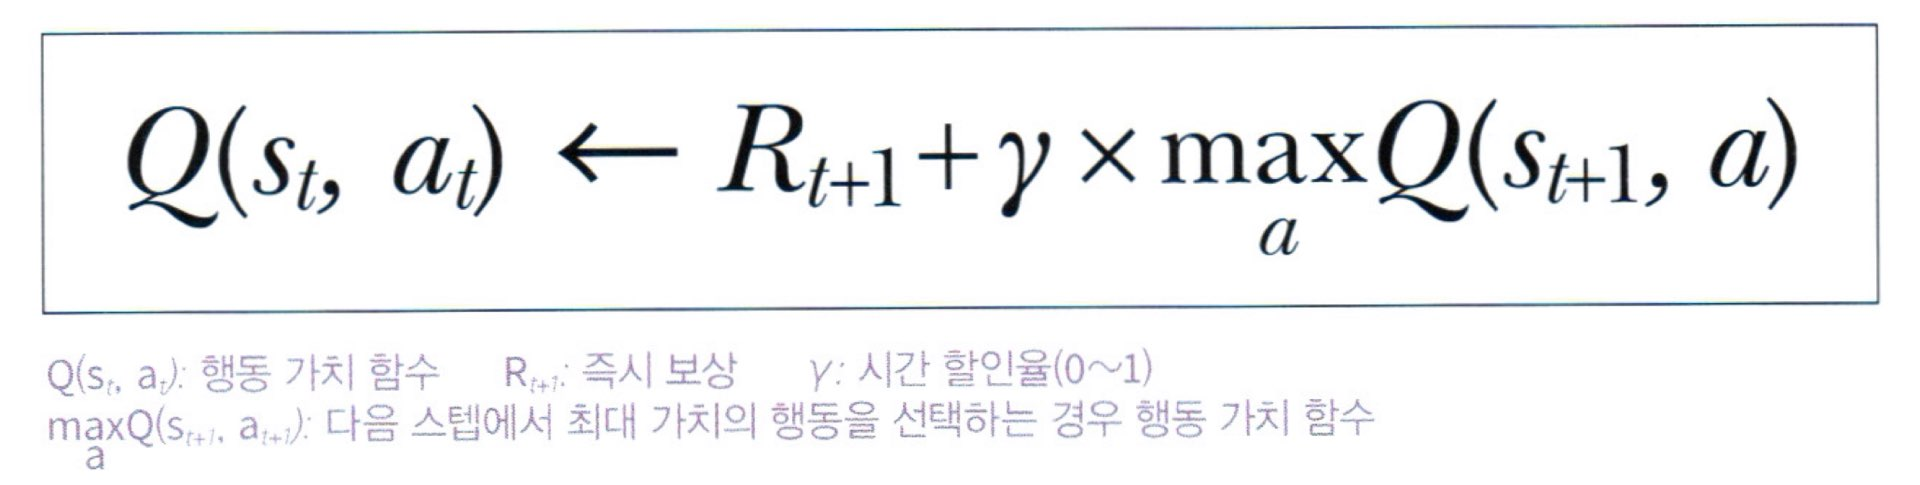

In [ ]:
Image('/content/drive/My Drive/2020_AI_Busan/4_DeepLearning/pic_rl/dqn4.jpg')

# 행동 가치 함수 갱신에 대한 식

In [ ]:
with tf.device('/device:GPU:0') :
  # 5연속(가정, 설정값)으로 190회 이상 스텝 이동을 수행했다(보상 1을 받음). -> 에피소드 반복 종료
  success_cnt = 0
  total_step = 0                                    # 총 스텝 수, 매 스텝이 진행될 때마다 증가한다.

  for episode in range(1, NUM_EPISODES+1) :         # 500회 에피소드 작동
    step = 0                                        # 에피소드 별 스텝 횟수(이동 횟수)
    # 에피소드가 진행되기 전에 가치 계산용인 target_qn의 W를 main_qn으로 덮어쓴다 -> 전이
    target_qn.model.set_weights(main_qn.model.get_weights())

    # 에피소드 진행 -> 에피소드 종료 조건에 걸리지 않게 컨트롤 수행
    # 에이전트가 카트폴을 컨트롤한다 -> MAX_STEP 횟수만큼
    for _ in range(1, MAX_STEP+1) :
      step += 1                                     # 개별 에피소드 별 스텝 횟수 증가(이동 횟수 증가) -> 보상 지급 판단 시 사용
      total_step += 1                               # 전체 스텝 증가
      # 엡실론은 감소시키겠다 -> 전체 수행횟수를 나름의 식에 사용하겠다.
      # E_START = 1.0                               # 엡실론의 초기값
      # E_STOP = 0.01                               # 엡실론의 최종값
      # E_DESC_RATE = 0.001                         # 감쇠율
      # 엡실론 간소식, 수행 횟수가 증가함에 따라 엡실론 값의 변동폭이 영향을 받는다.
      epsilon = (E_START - E_STOP) * np.exp( -E_DESC_RATE * total_step ) + E_STOP 

      # ========================================================================================================================
      # 1. 행동 획득
      # 초반에는 높은 엡실론 값 때문에 게임 환경으로부터 행동을 주로 선택받게 된다.
      # 이후 경험이 쌓이고 이 데이터를 기반으로 학습이 진행되면, 점차적으로 신경망을 통해서 행동을 추천 받게 된다.
      if epsilon > np.random.rand() :
        action = env.action_space.sample()          # 게임 환경에서 특정 행동을 선택하여 제공해준다.(왼쪽 or 오른쪽)
      else :
        # 내가 만든 정책, 룰, 방법에 의해서 행동을 결정하겠다 -> 현재 상태를 넣어서 행동을 예측하겠다.  
        # 인공신경망에 데이터를 넣어서 예측 받겠다.
        # 1개 넣어서 1개의 예측이 나왔다.
        # X = state = [[상태값, 상태값, 상태값, 상태값]]
        # y = preidct=[[왼쪽확률, 오른쪽확률]]
        # y = preidct=[[왼쪽으로 갔을 때 얻을 수 있는 가치, 오른쪽으로 갔을 때 얻을 수 있는 가치]]
        action = np.argmax(main_qn.model.predict(state)[0])

      # ========================================================================================================================
      # 2. 행동을 취하면 나오는 다음 상태와 보상을 획득
      # 여기서 보상은 에피소드 종료 후 190 스텝 이상 무빙했을 경우 받게 되어서, 여기서는 제외
      # 이런 기능은 게임 환경에서 제공 받으므로, 보상에 대한 언급을 하였다.
      # 반환값 : 다음 상태, 무시, 완료 여부, 무시
      next_state, _, done, _ = env.step(action)
      # 다음번 스텝에서 action을 처리하기 위해 입력 형태를 조정
      next_state = np.reshape(next_state, [-1, state_size])

      # ========================================================================================================================
      # 3. 에피소드가 종료되었는지 판단
      if done :     # 에피소드 종료 -> 1번의 게임이 종료되었다.
        # 보상 판단 기준
        if step >= 190 :    # 보상 지급
          reward = 1
          success_cnt += 1  # 성공 횟수를 증가시킨다.
        else :              # 보상 없음
          reward = 0
          success_cnt = 0   # 성공 횟수를 초기화시킨다(연속 성공이 중단되었다).
        # 에피소드가 끝났다. => 메모리에 기록한다. => 이 데이터를 근간으로 신경망을 학습시켜야 하니까
        # 경험을 추가하는데 웜업기간 동안만 기록
        if step > WARMUP :  # 최초 10번은 엉망일 것이라는 전제, 준비단계라서 데이터적으로 의미가 없다고 설정
          # 경험 추가 : ( 현재 상태, 액션, 보상, 다음 상태 )
          # ([값, 값, 값, 값], 0 또는 1, 0 또는 1, [값, 값, 값, 값])
          memory.add(( state, action, reward, np.zeros(next_state.shape) ))

      else :        # 아직 진행 중
        reward = 0  # 게임이 안 끝났으므로, 보상을 검토하는 단계가 아니다.(값 0)
        if step > WARMUP :
          memory.add(( state, action, reward, next_state ))
        # 다음번 수행을 위해서 현재 상태를 다음 상태로 변경한다.
        state = next_state

      # ========================================================================================================================
      # 4. 어느 정도 시간이 지나면, 경험 데이터가 충분히 쌓이게 된다.
      if len(memory) >= BATCH_SIZE :        # 최소지만 학습 진행이 가능
        # 학습 시 투입되는 입력
          # (32,4) => (데이터는 32개, 각각의 데이터는 4개의 상태값을 가지고 있다. = 저장된 데이터 중 상태값만 취해서 오면 된다. 그것이 4(카트위치,카트속도,막대속도,막대각속도)이다.)
        inputs = np.zeros((BATCH_SIZE, state_size))     # (32, 4)
        targets = np.zeros((BATCH_SIZE, action_size))   # (32, 2)

        # 데이터 획득 => 32개 세트 획득
        minibatch = memory.sample( BATCH_SIZE )
        '''
        [
          [[값,값,값,값], 1 or 0, 1 or 0, [값,값,값,값]],
          [[값,값,값,값], 1 or 0, 1 or 0, [값,값,값,값]],
          [[값,값,값,값], 1 or 0, 1 or 0, [값,값,값,값]],
          ...,
          [[값,값,값,값], 1 or 0, 1 or 0, [값,값,값,값]]
        ]
        '''

        # 데이터를 추출하여 훈련할 수 있게 구성하겠다
        for i, (state_b, action_b, reward_b, next_state_b) in enumerate(minibatch) :
          # 상태값 세팅
          inputs[i] = state_b
          # next_state_b를 이용하여 보상을 판단해야 한다.
          # 다음 행동이 없는 경우 => 에피소드 종료된 마지막 데이터
          # 다음 행동이 있는 경우 => 진행 중이었던 데이터
          # 쉽게 가치를 판단하는 방법
          # 무조건 에피소드 끝나고, 190회의 스텝을 유지했다면 얻는 표식
          # next_state_b가 0행렬임을 체크해서 분기하는 게 정석
          if (next_state_b == np.zeros(next_state_b.shape)).all(axis=1) :
          # if reward_b :
            # 가치 계산
            target = reward_b + GAMMA * 0
          else : 
            # 가치 계산
            # target_qn을 이용하여 가치 계산을 수행한다.
            target = reward_b + GAMMA * np.max(target_qn.model.predict(next_state_b)[0])

          # 계산된 가치값을 업데이트
          # 예측을 통해서 행동별 가치값을 구한다.
          targets[i] = main_qn.model.predict(state_b)
          # 계산된 가치값을 행당 항목에 맞춰서 업데이트
          # 실제 시뮬레이션 상에서 취했던 액션 위치로 가치를 업데이트한다.
          targets[i][action_b] = target

        # 학습, 훈련 진행
        # 1세대만 학습을 진행, 로그 출력 안 한다.
        main_qn.model.fit(inputs, targets, epochs=1, verbose=0)  

      # ========================================================================================================================
      # 5. done이 존재하면 에피소드 종료
      if done : 
        break

    # [1개의 에피소드가 끝났다.] =============================================================================================== 
    print(f'에피소드:{episode:3} 스텝수:{step:3} epsilon:{epsilon}')
    # [E1] 5회 연속 수행하였는가?
    if success_cnt >= 5 :
      break
    # [E2] 게임 초기화(환경 초기화)
    state = env.reset()
    state = np.reshape(state, [-1, state_size])

에피소드:  1 스텝수: 58 epsilon:0.9442134479624306
에피소드:  2 스텝수: 15 epsilon:0.9303048217255349
에피소드:  3 스텝수: 30 epsilon:0.9031057037467013
에피소드:  4 스텝수: 14 epsilon:0.8906893412317772
에피소드:  5 스텝수: 18 epsilon:0.8749787525711541
에피소드:  6 스텝수: 11 epsilon:0.8655161261527964
에피소드:  7 스텝수: 12 epsilon:0.8553112841487969
에피소드:  8 스텝수: 27 epsilon:0.8327932410136044
에피소드:  9 스텝수: 18 epsilon:0.8181154590113539
에피소드: 10 스텝수: 10 epsilon:0.8100745758443235
에피소드: 11 스텝수: 11 epsilon:0.8013219830256715
에피소드: 12 스텝수: 14 epsilon:0.7903206641828326
에피소드: 13 스텝수: 18 epsilon:0.7764005491043259
에피소드: 14 스텝수: 16 epsilon:0.7642357184789392
에피소드: 15 스텝수: 22 epsilon:0.7478237265288558
에피소드: 16 스텝수: 62 epsilon:0.7034678940328999
에피소드: 17 스텝수: 50 epsilon:0.6696470657506375
에피소드: 18 스텝수: 63 epsilon:0.6293713073247477
에피소드: 19 스텝수: 32 epsilon:0.6098651878950156
에피소드: 20 스텝수: 85 epsilon:0.5609835440663602
에피소드: 21 스텝수: 69 epsilon:0.5242476419611777
에피소드: 22 스텝수: 55 epsilon:0.49672775548635545
에피소드: 23 스텝수: 54 epsilon:0.4711

# 코드 9 - 시뮬레이션 GYM을 이용하여 플레이(오류 때문에 확인 필요)